In [26]:
import json
import seaborn as sns
import glob
import os
import numpy as np

In [34]:
import pandas as pd
import tqdm
import itertools
i =0
cladefolders = '../CATH_data/'
allfolders = glob.glob(cladefolders)
dfs = []
print(allfolders)
#scorefunc = 'score'
scorefunc = 'score_x_frac'
for clade in allfolders:
    print(clade)
    res = {}
    folders = set(glob.glob(clade + '*/' ))-set([clade+'logs/'])
    with tqdm.tqdm(total=len(folders)) as pbar:
        for i,folder in enumerate(folders):                
            nstructs = len(glob.glob(folder+'structs/*.pdb'))
            if os.path.isfile(folder+'treescores_sequences.json'):
                treescores = glob.glob(folder + '*_treescores_struct_tree.json' ) +[folder+'treescores_sequences.json']
                if len(treescores)>0 and os.path.isfile(folder + 'sequences.fst'):
                    with open(folder + 'sequences.fst') as fstin:
                        nseqs = fstin.read().count('>')
                    #pbar.set_description('processed: %d' % (1 + i))
                    #pbar.update(1)
                    #if nseqs == nstructs :
                    print(nseqs , nstructs )
                    for score in treescores:
                        with open(score) as taxin:
                            tax_res = json.load(taxin)
                        tax_res= {s.split('/')[-1]:tax_res[s] for s in tax_res}
                        if folder not in res:
                            res[folder] = { s:tax_res[s][scorefunc] for s in tax_res if  scorefunc  in tax_res[s]}
                        else:
                            res[folder].update({ s:tax_res[s][scorefunc] for s in tax_res if scorefunc in tax_res[s]})
    if len(res)>0:
        resdf = pd.DataFrame.from_dict(res, orient = 'index')
        resdf.columns = [ c.replace('.PP.nwk.rooted', '').replace('.aln.fst.nwk.rooted' , '' ) for c in  resdf.columns]
        refclols = resdf.columns
        for c1,c2 in itertools.combinations(resdf.columns,2):
            resdf[c1+'_'+c2+'_delta'] = resdf[c1] - resdf[c2] 
            resdf[c1+'_'+c2+'_max'] = resdf[[c1,c2]].apply( max , axis = 1) 
            resdf[c1+'_'+c2+'_delta_norm'] = resdf[c1+'_'+c2+'_delta'] / resdf[c1+'_'+c2+'_max']
        resdf['clade'] = clade
        resdf['HOG'] = folder.split('/')[-1]
        dfs.append(resdf)
tree_resdf = pd.concat(dfs)

['../CATH_data/']
../CATH_data/


  0%|          | 0/2000 [00:00<?, ?it/s]

43 43
13 13
55 55
21 21
33 33
28 28
11 11
25 25
10 10
21 21
3 3
43 43
23 23
7 7
22 22
18 18
24 24
15 15
4 4
19 19
4 4
13 13
24 24
27 27
58 58
39 39
17 17
11 11
24 24
32 32
60 60
3 3
3 3
30 30
29 29
5 5
5 5
10 10
25 25
15 15
76 76
36 36
11 11
16 16
6 6
41 41
40 40
10 10
7 7
12 12
86 86
20 20
8 8
32 32
71 71
30 30


  0%|          | 0/2000 [00:01<?, ?it/s]

29 29
38 38
36 36
32 32
48 48
31 31
4 4
11 11
59 59


In [35]:
print(tree_resdf)

                            alntmscore_0_exp_struct_tree  \
../CATH_data/3.90.110.10/                          451.0   
../CATH_data/3.40.50.1100/                         153.0   
../CATH_data/3.40.605.10/                          193.0   
../CATH_data/1.10.20.10/                            63.0   
../CATH_data/2.40.128.20/                          658.0   
...                                                  ...   
../CATH_data/3.30.540.10/                            NaN   
../CATH_data/3.30.390.10/                            NaN   
../CATH_data/1.10.600.10/                            NaN   
../CATH_data/3.40.50.1370/                           NaN   
../CATH_data/3.40.50.20/                             NaN   

                            alntmscore_1_exp_struct_tree  \
../CATH_data/3.90.110.10/                          467.0   
../CATH_data/3.40.50.1100/                         155.0   
../CATH_data/3.40.605.10/                          201.0   
../CATH_data/1.10.20.10/               

In [36]:
#add nsequences 
#ncoverage clade
#len sequence
#pdb pred quality
#rf dist
#resdf = resdf[resdf.clade == '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/' ]

print(len(tree_resdf))

65


alntmscore_0_exp_struct_tree sequences


-834.0 -3.272756782706301 WilcoxonResult(statistic=101.5, pvalue=0.0008033098874283823)


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



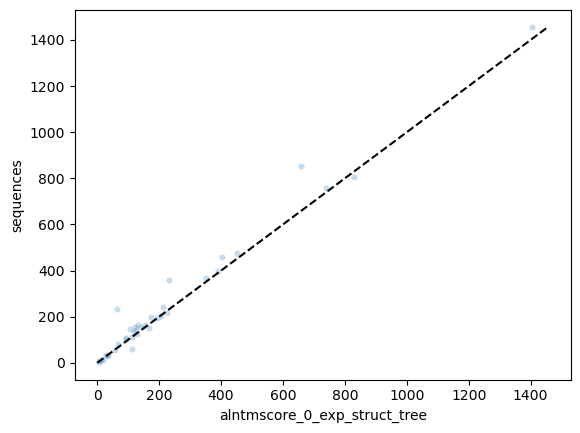

alntmscore_1_exp_struct_tree sequences


-536.0 -1.9431914612729988 WilcoxonResult(statistic=58.5, pvalue=0.0089100318429833)


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



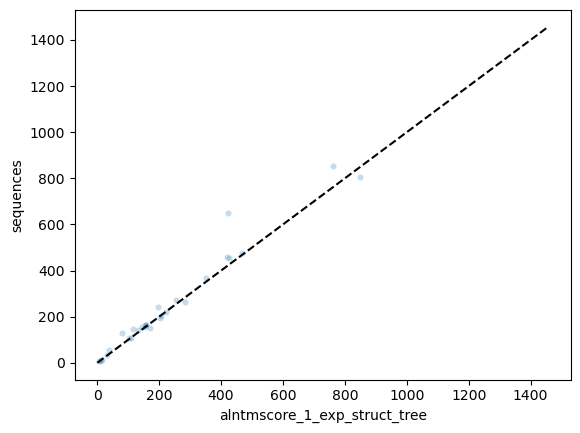

fident_0_raw_struct_tree sequences


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



-234.0 -1.0825698833967399 WilcoxonResult(statistic=243.0, pvalue=0.3512756847126659)


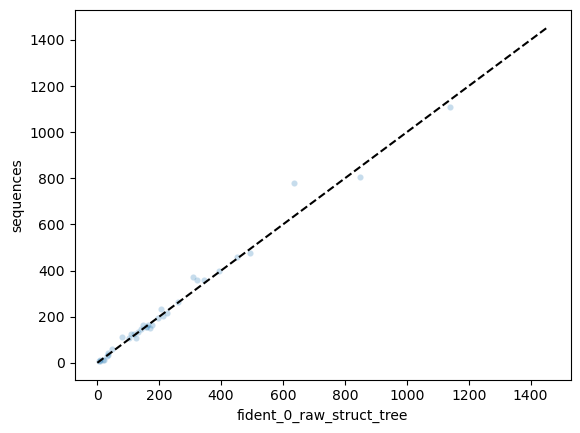

lddt_0_exp_struct_tree sequences


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



-496.0 -3.4722880651443613 WilcoxonResult(statistic=212.5, pvalue=0.09304172012010228)


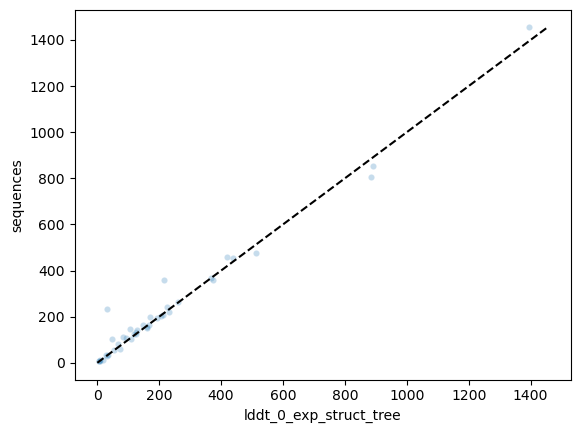

lddt_1_exp_struct_tree sequences


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



-83.0 -1.2863613200055601 WilcoxonResult(statistic=223.5, pvalue=0.853065798570636)


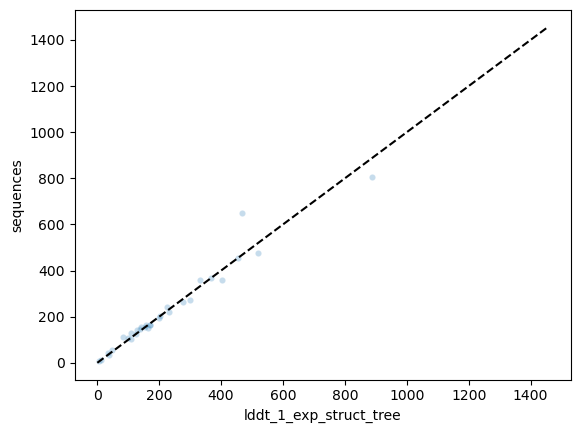

fident_0_exp_struct_tree sequences


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



-237.0 -1.354018802321688 WilcoxonResult(statistic=226.0, pvalue=0.8935744322293157)


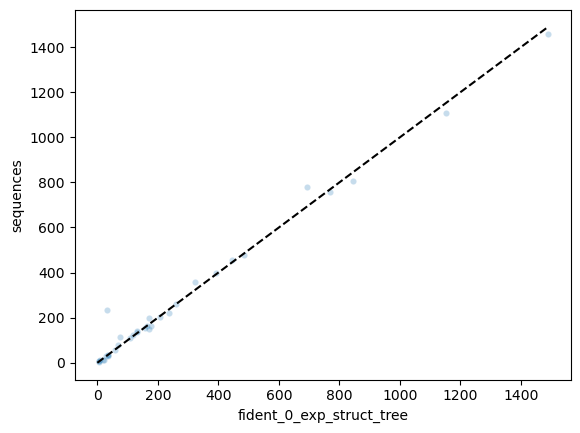

lddt_1_raw_struct_tree sequences


58.0 -0.8250210299900992 WilcoxonResult(statistic=402.5, pvalue=0.7163982910772626)


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



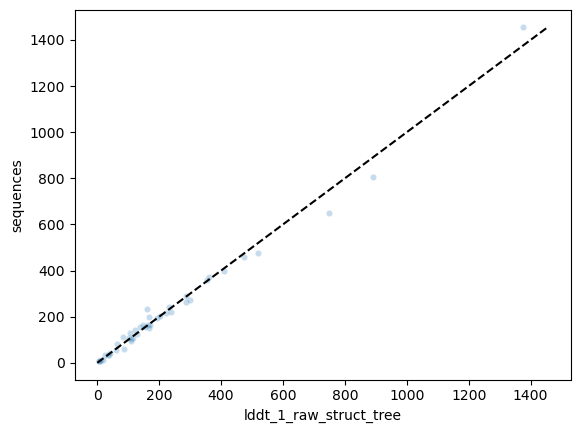

fident_1_raw_struct_tree sequences


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



167.0 1.7316027125125784 WilcoxonResult(statistic=165.5, pvalue=0.03975572993072083)


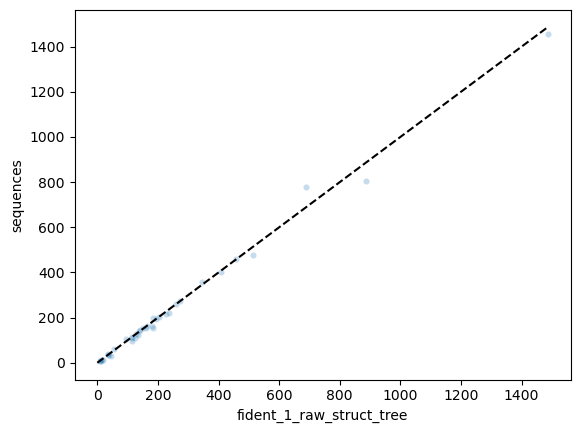

fident_1_exp_struct_tree sequences


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



273.0 1.5074190070165003 WilcoxonResult(statistic=79.0, pvalue=0.008119721586820207)


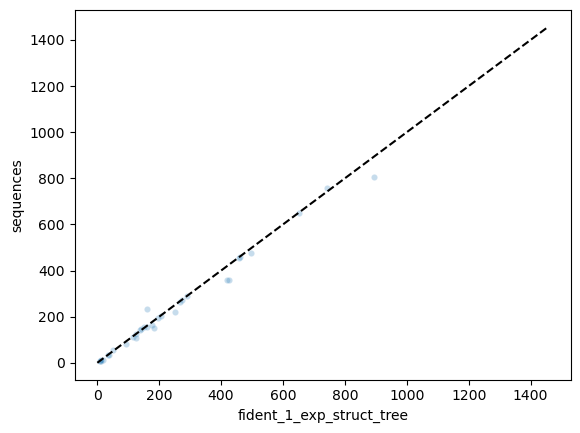

alntmscore_1_raw_struct_tree sequences


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



-174.0 -0.4324330170704071 WilcoxonResult(statistic=319.0, pvalue=0.4548530942395159)


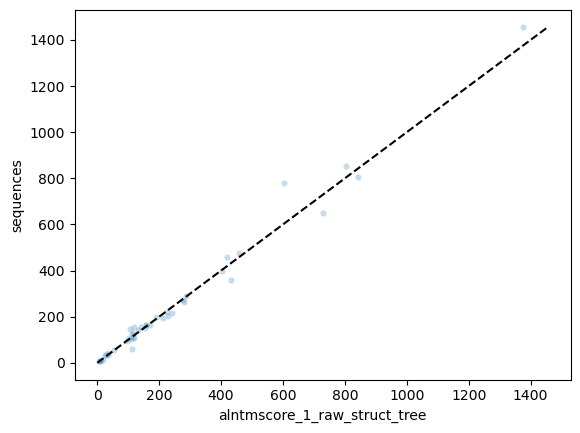

sequences alntmscore_0_raw_struct_tree


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



342.0 1.4253517961944246 WilcoxonResult(statistic=281.0, pvalue=0.28740099095502925)


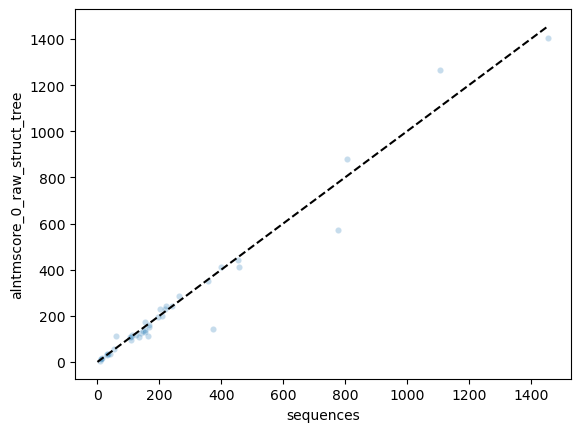

sequences lddt_0_raw_struct_tree


/work/FAC/FBM/DBC/cdessim2/default/dmoi/miniconda3/envs/ML2/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



198.0 1.4694345564415643 WilcoxonResult(statistic=245.5, pvalue=0.2547589915245214)


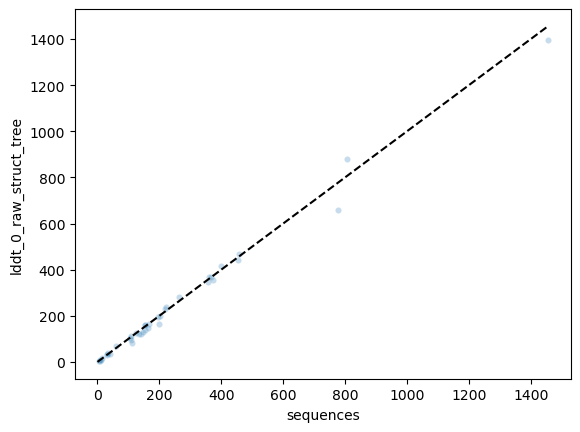

In [37]:
from matplotlib import pyplot as plt

import plotly.express as px
for c1,c2 in itertools.combinations(refclols,2):
    if 'sequence' in c1 or 'sequence' in c2:
        print(c1,c2)
        
            
        fig = px.scatter(tree_resdf, x=c1, y=c2 , hover_data=[c1+'_'+c2+'_delta_norm' ])
        
        fig.show()
        
        sns.scatterplot(tree_resdf, x = c1, y=c2 , alpha = .25 , s = 20 )

        from scipy.stats import wilcoxon
        print(tree_resdf[c1+'_'+c2+'_delta'].dropna().sum(), tree_resdf[c1+'_'+c2+'_delta_norm'].dropna().sum(),wilcoxon(tree_resdf[c1+'_'+c2+'_delta'].dropna()))
        maxval = tree_resdf[[c1, c2]].max().max()
        sns.lineplot(x = [0,maxval] , y = [0,maxval] , linestyle='--' , c = 'k')
        plt.show()

<AxesSubplot: >

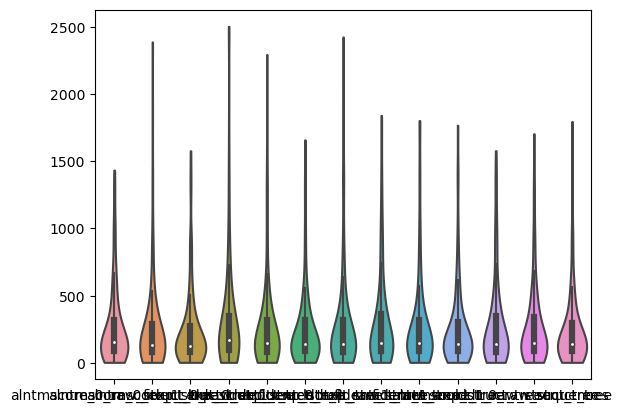

In [14]:
sns.violinplot(tree_resdf[refclols] , cut = 0 )


In [7]:
#sns.violinplot(resdf['delta_norm'])
sns.violinplot(tree_resdf[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted']] , cut = 0)
print(tree_resdf['delta'].sum() )
print(tree_resdf['delta_norm'].sum() )

KeyError: "None of [Index(['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted'], dtype='object')] are in the [columns]"

In [8]:
sns.violinplot(tree_resdf['delta'])

KeyError: 'delta'

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/
struct_tree.nwk.PP.nwk.rooted    73.455099
core_tree.nwk.PP.nwk.rooted      73.456621
sequences.aln.fst.nwk.rooted     73.225266
delta                             0.229833
max                              75.098935
delta_norm                        0.002770
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


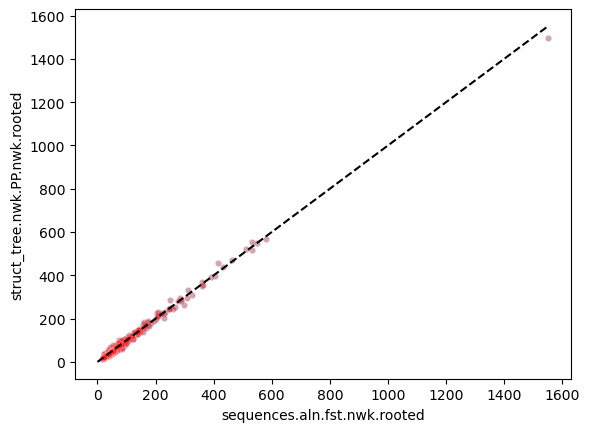

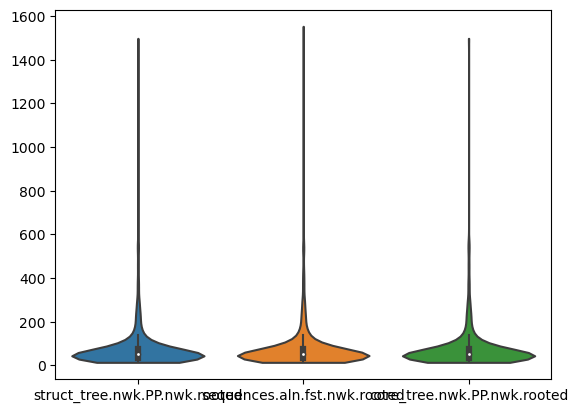

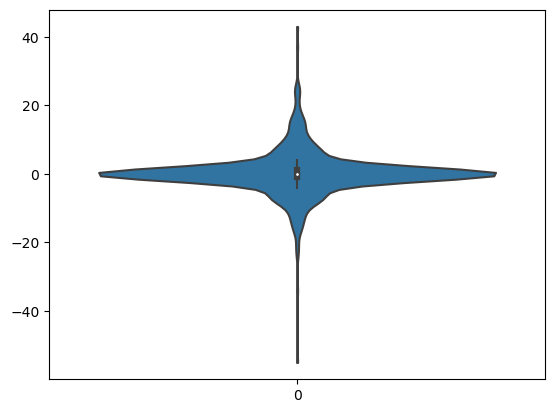

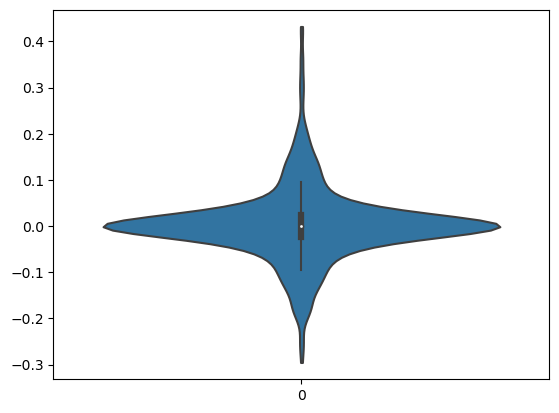

151 WilcoxonResult(statistic=44422.5, pvalue=0.6178605003753332)
1.8197588925547938 WilcoxonResult(statistic=45208.5, pvalue=0.8506301919154431)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/
struct_tree.nwk.PP.nwk.rooted    246.662026
core_tree.nwk.PP.nwk.rooted      246.631864
sequences.aln.fst.nwk.rooted     251.926527
delta                             -5.264501
max                              253.545244
delta_norm                        -0.016798
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


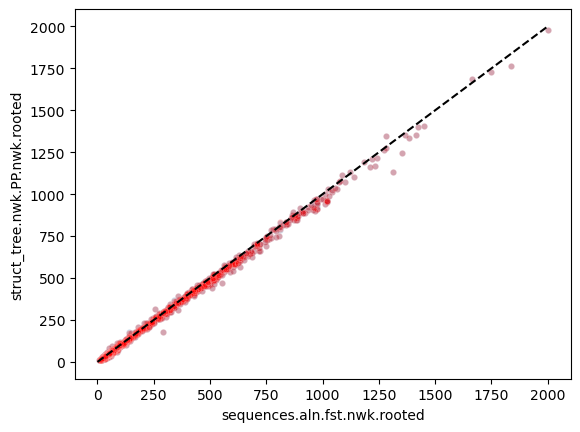

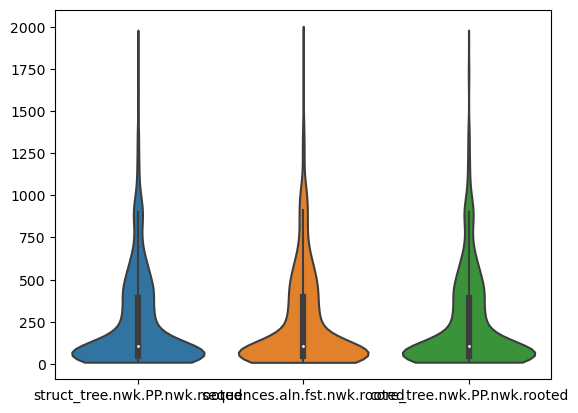

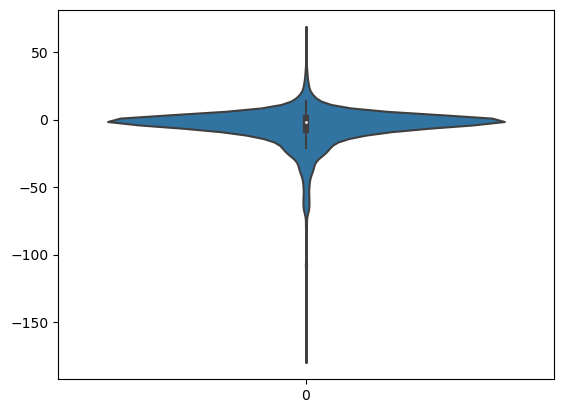

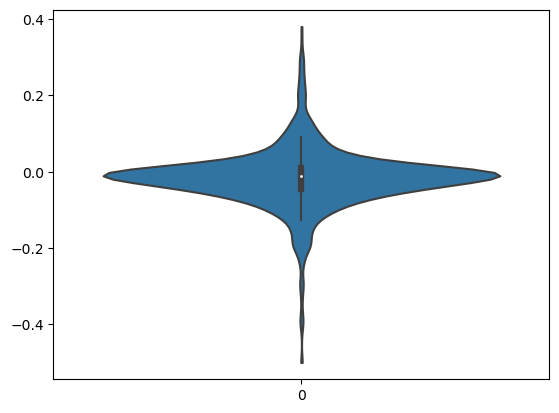

-6807 WilcoxonResult(statistic=161415.0, pvalue=1.0191735720945887e-44)
-21.71950626692426 WilcoxonResult(statistic=200611.5, pvalue=2.8828553952996364e-25)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/
struct_tree.nwk.PP.nwk.rooted    369.116967
core_tree.nwk.PP.nwk.rooted      369.157455
sequences.aln.fst.nwk.rooted     375.817481
delta                             -6.700514
max                              377.863111
delta_norm                        -0.016864
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


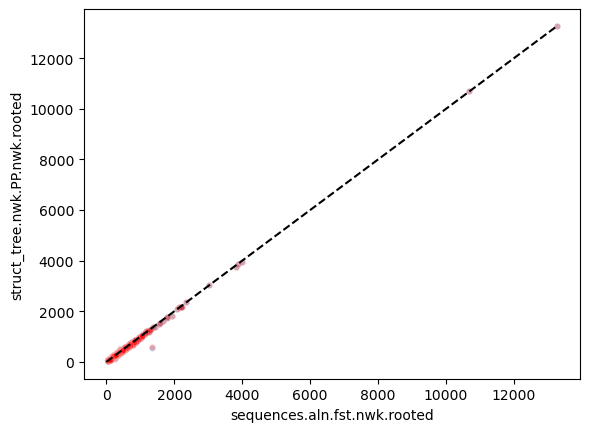

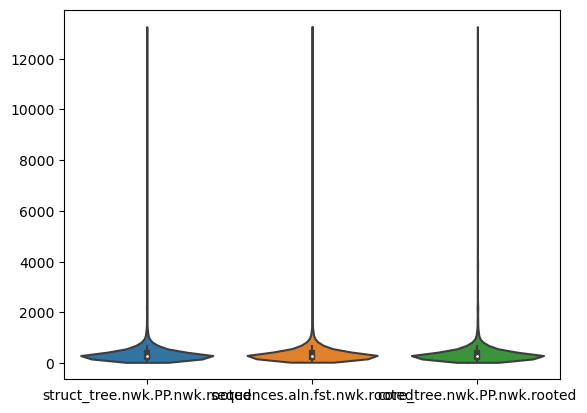

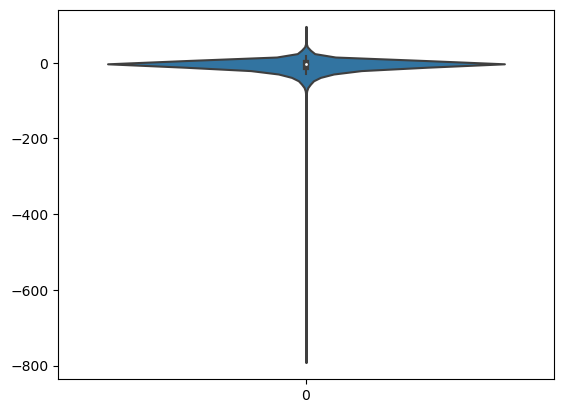

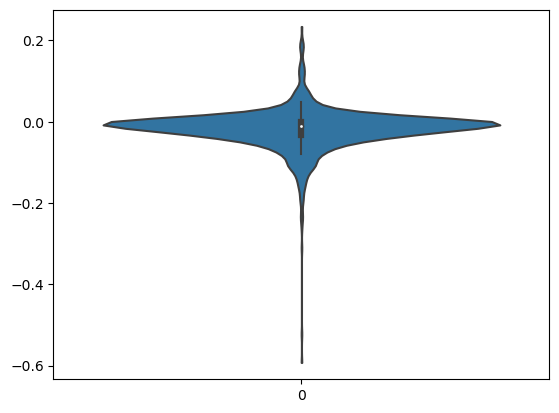

-10426 WilcoxonResult(statistic=211659.0, pvalue=1.4457182537044683e-67)
-26.240546664667058 WilcoxonResult(statistic=223131.5, pvalue=1.166157492999848e-61)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/
struct_tree.nwk.PP.nwk.rooted    415.114738
core_tree.nwk.PP.nwk.rooted      415.147379
sequences.aln.fst.nwk.rooted     417.486647
delta                             -2.371909
max                              420.727992
delta_norm                        -0.006058
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


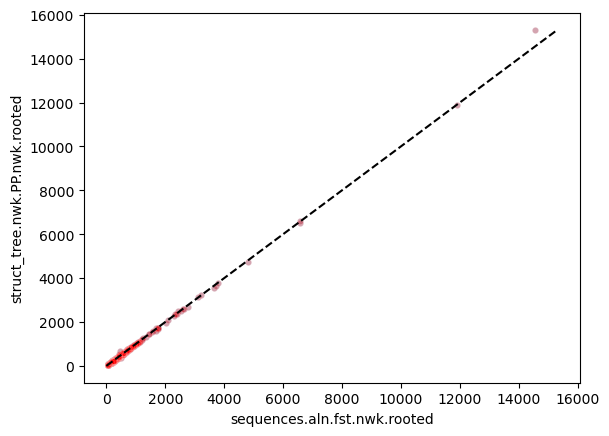

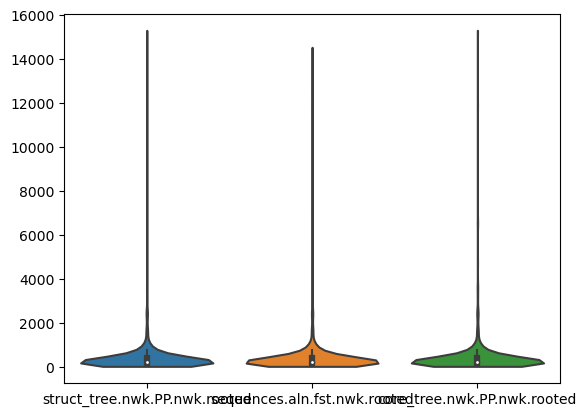

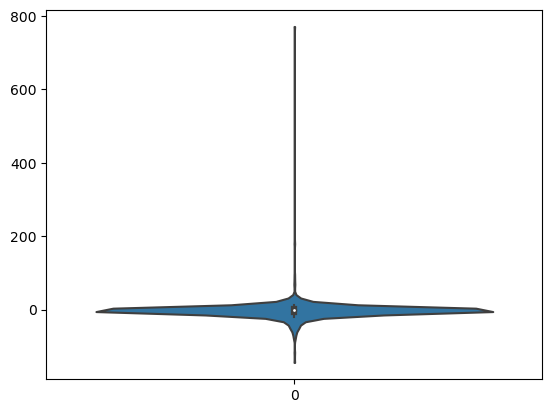

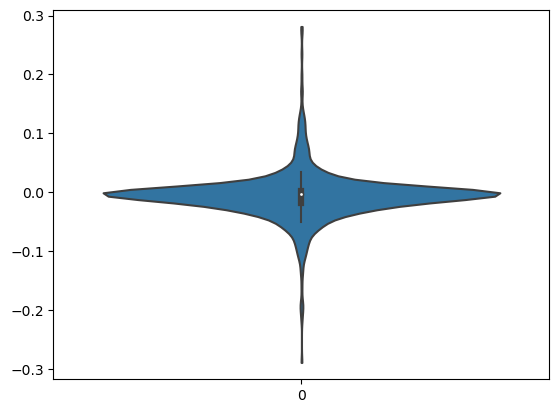

-2398 WilcoxonResult(statistic=100297.0, pvalue=1.217690342742138e-18)
-6.124724663431841 WilcoxonResult(statistic=103588.0, pvalue=1.0809406721212726e-16)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/
struct_tree.nwk.PP.nwk.rooted    96.176796
core_tree.nwk.PP.nwk.rooted      96.132597
sequences.aln.fst.nwk.rooted     97.121547
delta                            -0.944751
max                              97.751381
delta_norm                       -0.010116
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


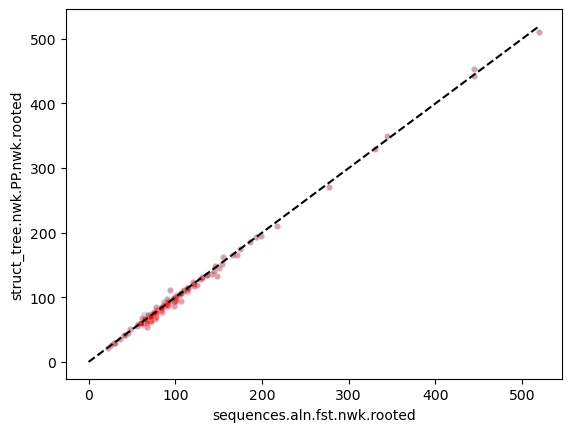

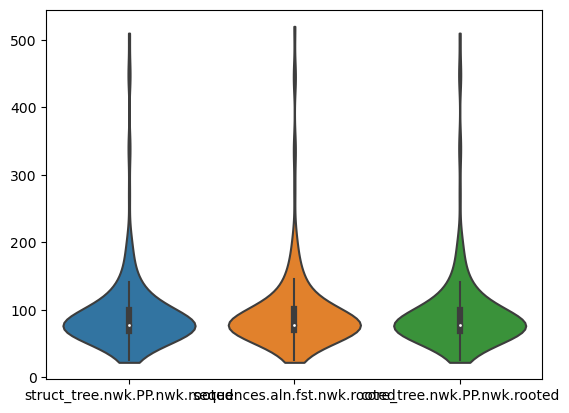

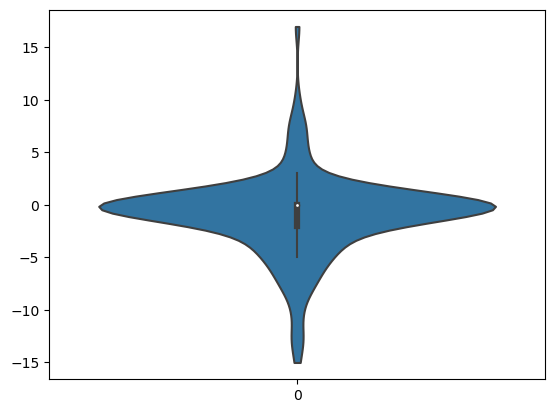

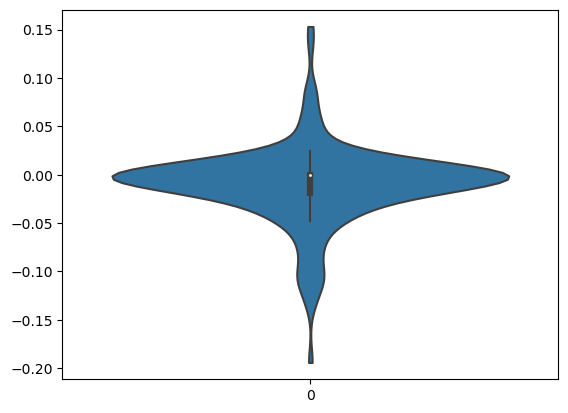

-171 WilcoxonResult(statistic=1682.0, pvalue=9.93582458689547e-05)
-1.830930182247622 WilcoxonResult(statistic=1695.5, pvalue=0.00013130595030209636)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/
struct_tree.nwk.PP.nwk.rooted    79.893939
core_tree.nwk.PP.nwk.rooted      79.893939
sequences.aln.fst.nwk.rooted     81.265152
delta                            -1.371212
max                              82.143939
delta_norm                       -0.017044
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


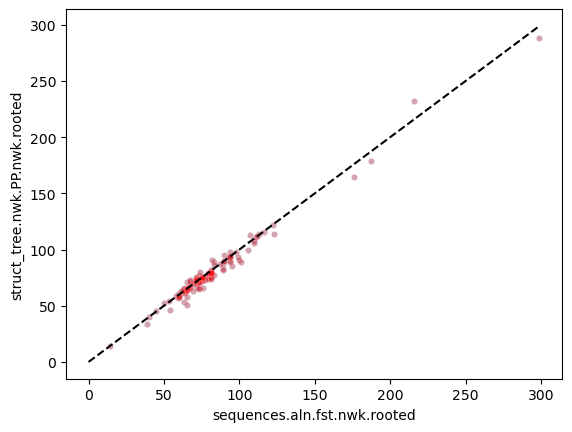

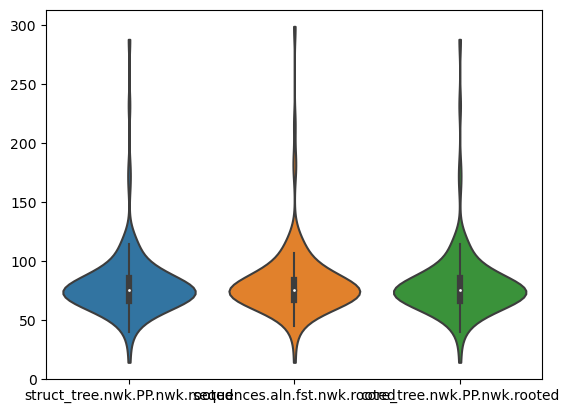

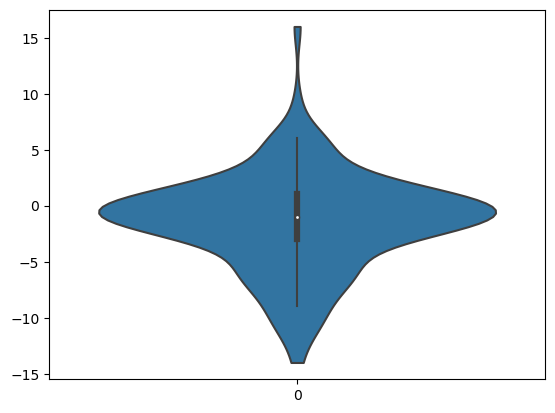

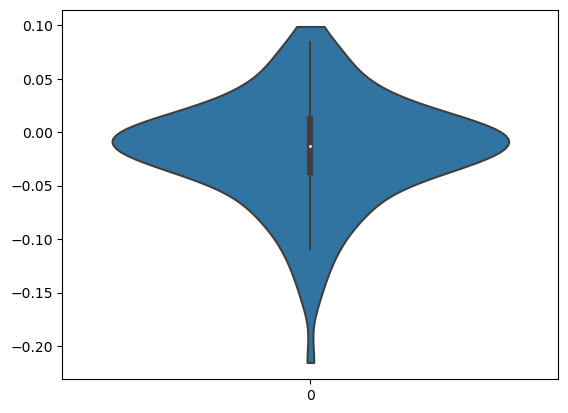

-181 WilcoxonResult(statistic=1656.0, pvalue=0.00018837509630559608)
-2.249847413229308 WilcoxonResult(statistic=1731.5, pvalue=0.0005018194050568486)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/
struct_tree.nwk.PP.nwk.rooted    377.915736
core_tree.nwk.PP.nwk.rooted      377.929949
sequences.aln.fst.nwk.rooted     382.732995
delta                             -4.817259
max                              384.832487
delta_norm                        -0.011454
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


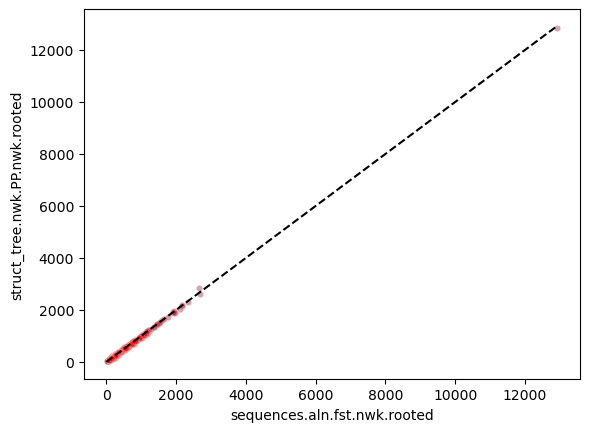

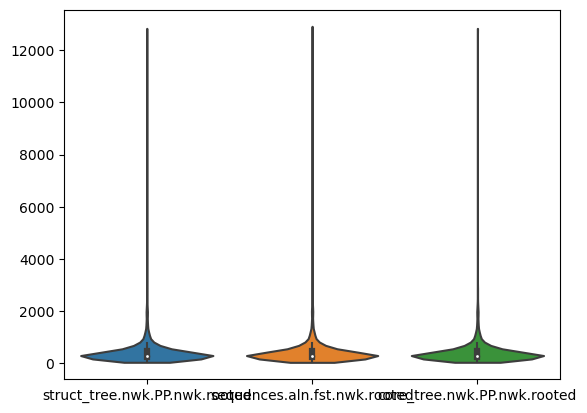

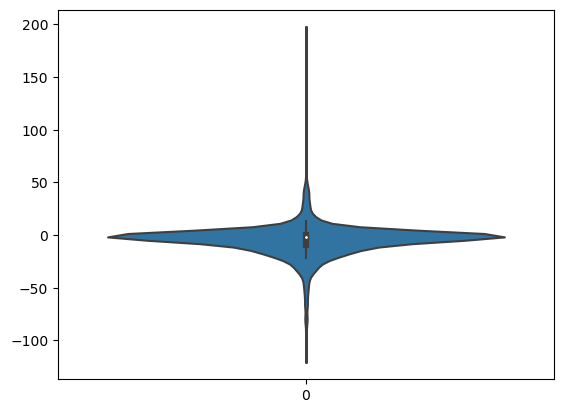

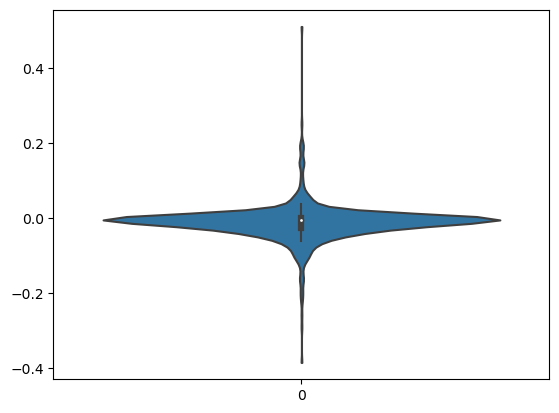

-4745 WilcoxonResult(statistic=72925.5, pvalue=1.5295405102348116e-37)
-11.282260028399016 WilcoxonResult(statistic=76060.5, pvalue=8.657553676387303e-35)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/
struct_tree.nwk.PP.nwk.rooted    490.977792
core_tree.nwk.PP.nwk.rooted      491.027919
sequences.aln.fst.nwk.rooted     503.813452
delta                            -12.835660
max                              505.878490
delta_norm                        -0.022476
dtype: float64


/tmp/25066229/ipykernel_3984039/1650548452.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


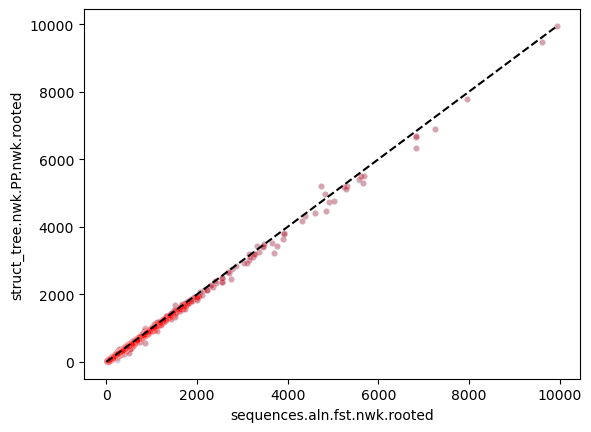

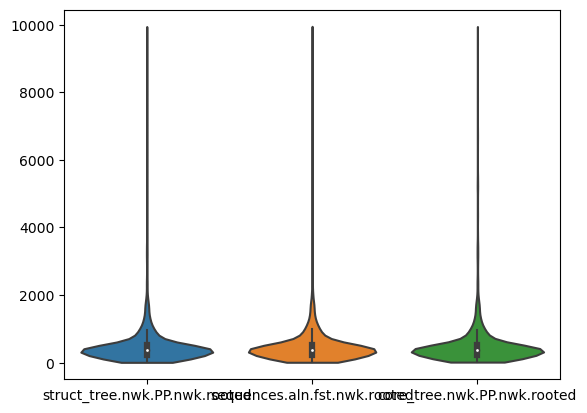

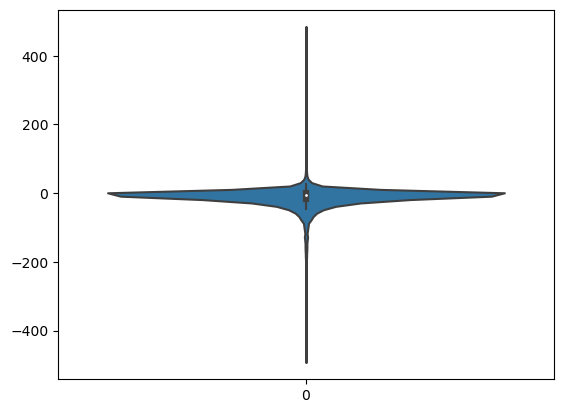

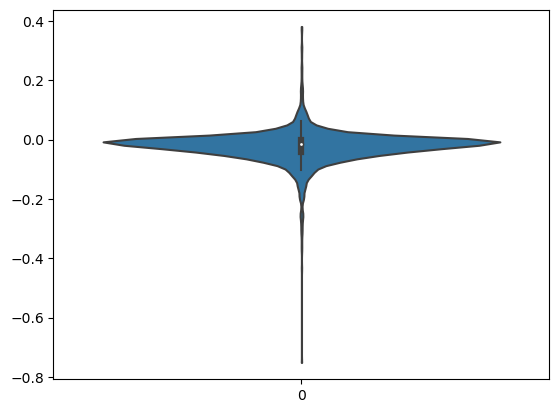

-40458 WilcoxonResult(statistic=605963.5, pvalue=1.4824048824815878e-217)
-70.84305446313886 WilcoxonResult(statistic=704917.5, pvalue=8.810072571382074e-187)


In [31]:
#sub = resdf[['sequences.aln.fst.nwk.rooted' , 'struct_tree.nwk.PP.nwk.rooted' ]]
from matplotlib import pyplot as plt

for folder in tree_resdf.clade.unique():
    print(folder)
    sub = tree_resdf[tree_resdf.clade == folder]
    print(sub.mean())
    
    maxval = sub[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted']].max().max()
    
    sns.scatterplot(sub, x = 'sequences.aln.fst.nwk.rooted', y='struct_tree.nwk.PP.nwk.rooted' , alpha = .25 , s=20 )
    
    sns.scatterplot(sub, x = 'sequences.aln.fst.nwk.rooted', y='core_tree.nwk.PP.nwk.rooted' , alpha = .25 , s=20 , c='r' )
    
    sns.lineplot(x = [0,maxval] , y = [0,maxval] , linestyle='--' , c = 'k')
    
    plt.show()
    sns.violinplot(sub[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted', 'core_tree.nwk.PP.nwk.rooted']] , cut = 0 )
    plt.show()
    sns.violinplot(sub['delta'] , cut = 0 )
    plt.show()
    sns.violinplot(sub['delta_norm'] , cut = 0 )
    plt.show()
    
    print( sub.delta.sum(), wilcoxon(sub.delta))
    print( sub.delta_norm.sum(), wilcoxon(sub.delta_norm))


    

In [32]:
#construct structure and sequence feature dataset

def ret_description(vec , label = ''):
    return { label+'_mean': np.mean(vec) , label+'_max': np.amax(vec) , label+'_min': np.amin(vec) ,label+'_var': np.var(vec) }

allfolders = glob.glob(cladefolders)
dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    for folder in folders:
        if os.path.isfile(folder + 'plddt.json' ) and os.path.isfile(folder + 'sequence_dataset.csv' ) :
            plddt_df = pd.read_json(folder + 'plddt.json').T
            if len(plddt_df)>0:
                try:
                    plddt_df.columns = 'nobs,minmax,mean,variance,skewness,kurtosis'.split(',')
                    plddt_df['min'] = plddt_df.minmax.map( lambda r: r[0] )
                    plddt_df['max'] = plddt_df.minmax.map( lambda r: r[1] )
                    res[folder] = {}
                    for col in ['nobs', 'min' , 'max' , 'mean' , 'variance' , 'skewness' , 'kurtosis' ]:
                        descriptors = ret_description(plddt_df[col] , label = col)
                        for l in descriptors:
                            res[folder][l] = descriptors[l]
                    #add in some descriptors of the taxonomic spread and sequence set
                    seqdf = pd.read_csv(folder+'sequence_dataset.csv' )
                    res[folder]['nprots'] = len(seqdf)
                    cladesets = [ set(l.split(',')) for l in  seqdf['Taxonomic lineage (Ids)'] ]
                    union_all = cladesets[0]
                    intersection_all = cladesets[0]
                    for c in cladesets:
                        union_all = union_all.union(c)
                        intersection_all.intersection(c)
                    res[folder]['n_clades'] = len(union_all)
                    res[folder]['inter_clades'] = len(intersection_all)
                    res[folder]['inter/nc'] =  res[folder]['inter_clades'] /  res[folder]['n_clades'] 
                    res[folder]['nc/np'] = res[folder]['nprots'] / res[folder]['n_clades']
                except:
                    pass
    resdf = pd.DataFrame.from_dict(res, orient = 'index')
    dfs.append(resdf)
seqset_resdf = pd.concat(dfs)



['/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Tetrapoda/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Opisthokonta/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/']
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Tre

In [33]:
print(seqset_resdf)
seqset_resdf.to_csv('structure_and_sequence_qcmetrics.csv')

                                                      nobs_mean  nobs_max  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   807.250000       985   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   521.944444       811   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   401.434783       516   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...    64.357143        71   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   204.133333       215   
...                                                         ...       ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...  1041.034884      1191   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   446.782609       581   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   351.106061       480   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   384.966102       506   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   890.472222      1124   

                                                    nobs_min     nobs_var  

In [34]:
#add to the tree comparison data
tree_resdf = tree_resdf.merge( seqset_resdf , left_index = True, right_index = True, how = 'inner' )
print(tree_resdf)

                                                    struct_tree.nwk.PP.nwk.rooted  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             52   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             76   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            141   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             33   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             59   
...                                                                           ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                           1022   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            123   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            642   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            660   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...               

In [35]:
print(tree_resdf.columns)

Index(['struct_tree.nwk.PP.nwk.rooted', 'core_tree.nwk.PP.nwk.rooted',
       'sequences.aln.fst.nwk.rooted', 'delta', 'max', 'delta_norm', 'clade',
       'HOG', 'nobs_mean', 'nobs_max', 'nobs_min', 'nobs_var', 'min_mean',
       'min_max', 'min_min', 'min_var', 'max_mean', 'max_max', 'max_min',
       'max_var', 'mean_mean', 'mean_max', 'mean_min', 'mean_var',
       'variance_mean', 'variance_max', 'variance_min', 'variance_var',
       'skewness_mean', 'skewness_max', 'skewness_min', 'skewness_var',
       'kurtosis_mean', 'kurtosis_max', 'kurtosis_min', 'kurtosis_var',
       'nprots', 'n_clades', 'inter_clades', 'inter/nc', 'nc/np'],
      dtype='object')


In [36]:
#try to predict the delta using these features w gradient boosted trees
#try to predict the RF distance as well

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [43]:
X, y = tree_resdf[['nobs_mean', 'nobs_max',
       'nobs_min', 'nobs_var', 'min_mean', 'min_max', 'min_min', 'min_var',
       'max_mean', 'max_max', 'max_min', 'max_var', 'mean_mean', 'mean_max',
       'mean_min', 'mean_var', 'variance_mean', 'variance_max', 'variance_min',
       'variance_var', 'skewness_mean', 'skewness_max', 'skewness_min',
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc',
       'nc/np']], tree_resdf.delta_norm

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

The mean squared error (MSE) on test set: 0.0042


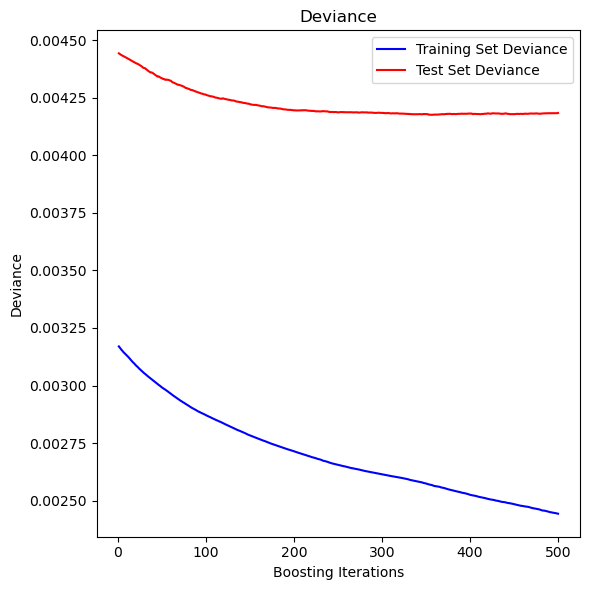

In [44]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

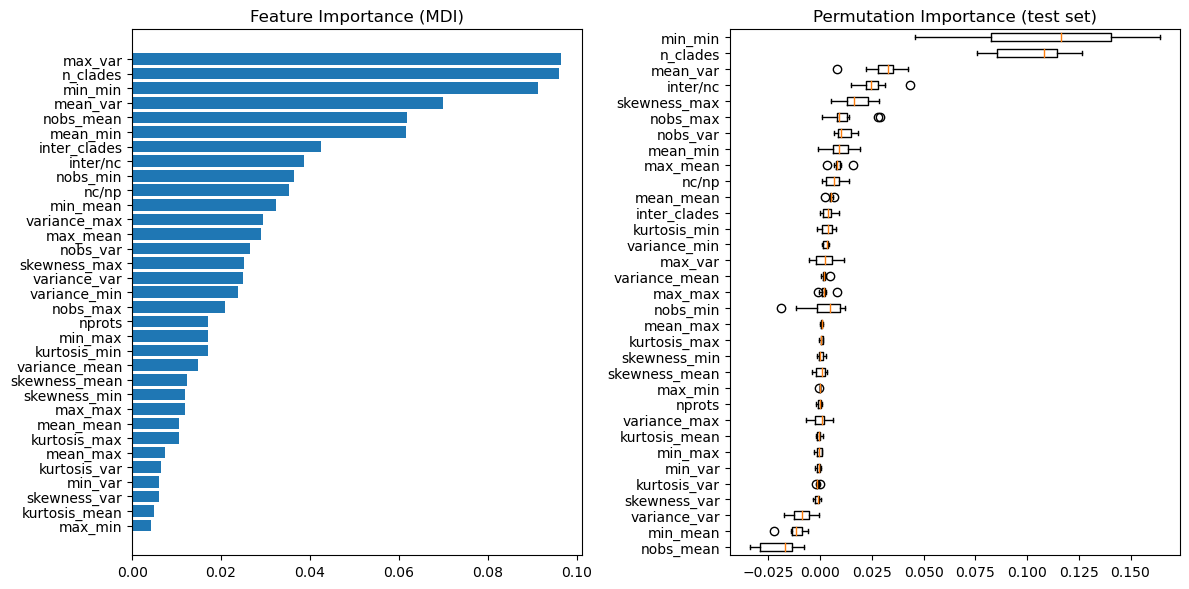

In [45]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()